# Data Analysis Part

## Load the Dataset

Once the Open Food data were retrieved and stored as `json` and `csv` format. The whole dataset was uploaded to Google Drive too for google colab usage.


In [1]:
# Import the needed librairies
from zipfile import ZipFile
import glob
import os
import json
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Constants
DATASET_ZIP_FOLDER='/content/gdrive/MyDrive/Data/Food_Data.zip'

DATASET_ROOT='./Food_Data'
DATASET_FOLDER_JSON=f'{DATASET_ROOT}/all-json/open_food_data*.json'
DATASET_FOLDER_CSV=f'{DATASET_ROOT}/all-csv/open_food_data*.csv'
UNKNOW_FIELD_VALUE='XXX'

## Load Dataset into DataFrame

In this section we read the `csv` files and create a dataframe.

In [3]:
# Load the Csv files
files=glob.glob(DATASET_FOLDER_CSV)
number_of_files=0
dfs=[]
for file in files:
    try:
        print(f'Loading CSV file {file}')
        # Create a Df for the loaded file
        df=pd.read_csv(file)
        # Add the df to dfs list
        dfs.append(df)
        number_of_files+=1
    except:
        print(f'Error reading Json {f}')
        
df = pd.concat(dfs)
print(f'{number_of_files} files have beed loaded')

Loading CSV file ./Food_Data/all-csv\open_food_data#0.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#1.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#10.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#11.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#12.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#2.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#3.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#4.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#5.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#6.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#7.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#8.csv
Loading CSV file ./Food_Data/all-csv\open_food_data#9.csv
13 files have beed loaded


#### Dataframe

In [4]:
df.columns

Index(['Unnamed: 0', 'Nom du Produit', 'Code_barres', 'Nutri-score', 'NOVA',
       'Eco-Score', 'Dénomination générique', 'Quantité', 'Conditionnement',
       'Marques', 'Catégories', 'Labels, certifications, récompenses',
       'Origine des ingrédients', 'Lieux de fabrication ou de transformation',
       'Code de traçabilité',
       'Lien vers la page du produit sur le site officiel du fabricant',
       'Magasins', 'Pays de vente', 'Additifs',
       'Ingrédients issus de l'huile de palme', 'Matières grasses / Lipides',
       'Acides gras saturés', 'Sucres', 'Sel',
       'Comparaison avec les valeurs moyennes des produits de même catégorie',
       'Energie (kcal)', 'Nombre de calorie (Énergie (kcal))',
       'Impact environnemental'],
      dtype='object')

In [5]:
# Clean the first added column with Csv => 'Unnamed: 0'
df=df.drop(df.columns[0], axis=1)
#df=df.sort_values(by=['Nom du Produit'])
df.head(10)

,Nom du Produit,Code_barres,Nutri-score,NOVA,Eco-Score,Dénomination générique,Quantité,Conditionnement,Marques,Catégories,...,Additifs,Ingrédients issus de l'huile de palme,Matières grasses / Lipides,Acides gras saturés,Sucres,Sel,Comparaison avec les valeurs moyennes des produits de même catégorie,Energie (kcal),Nombre de calorie (Énergie (kcal)),Impact environnemental
0,"Cristaline Eau de source - 1,5 l",3274080005003,Nutri-Score A,NOVA 1,XXX,Eau de source naturelle,"1,5 l","Bouteille, Plastique, Bouchon",Cristaline,"Boissons, Eaux, Eaux de sources, Eaux minéral...",...,XXX,No,0 g Matières grasses / Lipides en faible quantité,0 g Acides gras saturés en faible quantité,0 g Sucres en faible quantité,0.02 g Sel en faible quantité,Eaux minérales naturelles,0 kcal,0 kj\n(0 kcal),XXX
1,Nutella - Ferrero - 400 g,3017620422003,Nutri-Score E,NOVA 4,Éco-Score D,Pâte à tartiner aux noisettes et au cacao,400 g,"Verre, Couvercle, Plastique, Pot, Opercule, P...","Ferrero, Nutella","Produits à tartiner, Petit-déjeuners, Aides c...",...,E322 - Lécithines,Yes,30.9 g Matières grasses / Lipides en quantité ...,10.6 g Acides gras saturés en quantité élevée,56.3 g Sucres en quantité élevée,0.107 g Sel en faible quantité,Aide culinaire sucrée,539 kcal,2 252 kj\n(539 kcal),Impact environnemental élevé
2,Prince Chocolat - Lu - 300 g,7622210449283,Nutri-Score D,NOVA 4,Éco-Score D,BISCUITS FOURRÉS (35%) PARFUM CHOCOLAT,300 g,"Plastique, Film en plastique, Paquet, Mondele...",Lu,"Snacks, Snacks sucrés, Biscuits et gâteaux, B...",...,E503ii - Carbonate acide d'ammonium,Yes,17 g Matières grasses / Lipides en quantité mo...,5.6 g Acides gras saturés en quantité élevée,32 g Sucres en quantité élevée,0.58 g Sel en quantité modérée,Biscuits au chocolat,465 kcal,1 955 kj\n(465 kcal),Impact environnemental élevé
3,Coca-Cola - 330 ml,5449000000996,Nutri-Score E,NOVA 4,XXX,Soda aux extraits végétaux,330 ml,aluminium-can,Coca-cola,"Boissons, Boissons gazeuses, Sodas, Sodas au ...",...,XXX,No,0 g Matières grasses / Lipides en faible quantité,0 g Acides gras saturés en faible quantité,10.6 g Sucres en quantité élevée,0 g Sel en faible quantité,Sodas au cola,42 kcal,180 kj\n(42 kcal),XXX
4,Nutella - Ferrero - 1 kg,3017620425035,Nutri-Score E,NOVA 4,Éco-Score D,Pâte à tartiner aux noisettes,1 kg,"Pot, Verre, Couvercle, Plastique, Carton, Plaque","Ferrero, Nutella","Produits à tartiner, Petit-déjeuners, Produit...",...,E322 - Lécithines,Yes,30.9 g Matières grasses / Lipides en quantité ...,10.6 g Acides gras saturés en quantité élevée,56.3 g Sucres en quantité élevée,0.107 g Sel en faible quantité,Pâtes à tartiner aux noisettes et au cacao,539 kcal,2 252 kj\n(539 kcal),Impact environnemental élevé
5,"Muesli Raisin, Figue, Abricot - Bjorg - 375 g ℮",3229820129488,Nutri-Score A,NOVA 1,Éco-Score B,"Mélange biologique de céréales, de fruits et ...",375 g ℮,"Sachet, Plastique, Pensez au tri!, Point vert...",Bjorg,"Aliments et boissons à base de végétaux, Alim...",...,XXX,No,6.3 g Matières grasses / Lipides en quantité m...,1 g Acides gras saturés en faible quantité,13 g Sucres en quantité élevée,0.03 g Sel en faible quantité,Mueslis aux fruits,341 kcal,1 440 kj\n(341 kcal),Faible impact environnemental
6,Biscuit Sésame - Gerblé - 230 g,3175680011480,Nutri-Score C,NOVA 4,Éco-Score B,Biscuits au sésame,230 g,"Carton, Sachets, 20 biscuits en 4 sachets, Pa...",Gerblé,"Snacks, Snacks sucrés, Biscuits et gâteaux, B...",...,XXX,No,22 g Matières grasses / Lipides en quantité él...,2.2 g Acides gras saturés en quantité modérée,19 g Sucres en quantité élevée,0.61 g Sel en quantité modérée,Biscuits,484 kcal,2 025 kj\n(484 kcal),Faible impact environnemental
7,Nutella biscuits - Ferrero - 304 g,8000500310427,Nutri-Score E,NOVA 4,Éco-Score D,Biscuits fourrés à la pâte à tartiner aux noi...,304 g,"Plastique, mixed plastic-packet",Ferrero,"Snacks, Snacks sucrés, Biscuits et gâteaux, B...",...,E322 - Lécithines,Yes,24.5 g Matières grasses / Lipides en quantité ...,11.8 g Acides gras satu

In [6]:
print(f'Shape of the Dataframe {df.shape}')

Shape of the Dataframe (799915, 27)


In [7]:
columns=df.columns
print(f'Dataframe has {len(columns)} columns : \n{columns}')

Dataframe has 27 columns : 
Index(['Nom du Produit', 'Code_barres', 'Nutri-score', 'NOVA', 'Eco-Score',
       'Dénomination générique', 'Quantité', 'Conditionnement', 'Marques',
       'Catégories', 'Labels, certifications, récompenses',
       'Origine des ingrédients', 'Lieux de fabrication ou de transformation',
       'Code de traçabilité',
       'Lien vers la page du produit sur le site officiel du fabricant',
       'Magasins', 'Pays de vente', 'Additifs',
       'Ingrédients issus de l'huile de palme', 'Matières grasses / Lipides',
       'Acides gras saturés', 'Sucres', 'Sel',
       'Comparaison avec les valeurs moyennes des produits de même catégorie',
       'Energie (kcal)', 'Nombre de calorie (Énergie (kcal))',
       'Impact environnemental'],
      dtype='object')


#### **Question 1** : Distribution du nombre de produits par catégorie Nutri Score, Nova et Eco score.(5x4x5 = 100 possibilités)



##### **Cleaning of the Score columns**

In [8]:
# Nutri-Score
df['Nutri-score'].unique()

array(['Nutri-Score A', 'Nutri-Score E', 'Nutri-Score D', 'Nutri-Score C',
       'Nutri-Score B', 'Nutri-Score non calculé'], dtype=object)

In [9]:
# Nova
df['NOVA'].unique()

array(['NOVA 1', 'NOVA 4', 'NOVA non calculé', 'NOVA 3', 'NOVA 2'],
      dtype=object)

In [10]:
# Eco-Score
df['Eco-Score'].unique()

array(['XXX', 'Éco-Score D', 'Éco-Score B', 'Éco-Score E', 'Éco-Score C',
       'Éco-Score A'], dtype=object)

The Dataframe has a raw data, some of them weren't cleaned when they have been scrapped. Here I am creating a new function to clean the scores.

In [11]:
def clean_score(value):
  """
  Clean the Score Column. If the value is unknown, i.e 'Nutri-Score non calculé'
  it returns the 'XXX' value, otherwise it keeps the value
  
  Parameters
  ----------
  value: str
    The score value to clean.
  
  Returns
  ----------
        str: The cleaned value
  """
  if value in ['Nutri-Score non calculé', 'NOVA non calculé']:
    return UNKNOW_FIELD_VALUE
  else:
    return value


In [12]:
score_columns=['Nutri-score', 'NOVA', 'Eco-Score']
for column in score_columns:
  df[column]=df[column].apply(clean_score)

In [13]:
print(f"Nutri-score: {df['Nutri-score'].unique()}")
print(f"\nNOVA: {df['NOVA'].unique()}")
print(f"\nEco-Score: {df['Eco-Score'].unique()}")

Nutri-score: ['Nutri-Score A' 'Nutri-Score E' 'Nutri-Score D' 'Nutri-Score C'
 'Nutri-Score B' 'XXX']

NOVA: ['NOVA 1' 'NOVA 4' 'XXX' 'NOVA 3' 'NOVA 2']

Eco-Score: ['XXX' 'Éco-Score D' 'Éco-Score B' 'Éco-Score E' 'Éco-Score C'
 'Éco-Score A']


##### **Anwser 1** : Distribution du nombre de produits par catégorie Nutri Score, Nova et Eco score.(5x4x5 = 100 possibilités)


In [14]:
# Avoid combinaison ['XXX', 'XXX', 'XXX]
df_to_group=df[(df['Nutri-score']!=UNKNOW_FIELD_VALUE) | (df['NOVA']!=UNKNOW_FIELD_VALUE) | (df['Eco-Score']!=UNKNOW_FIELD_VALUE)]
df_grouped = df_to_group.groupby(score_columns)
df_grouped=df_grouped.count()[['Nom du Produit']]

# Rename the column
df_grouped=df_grouped.rename(columns={
    'Nom du Produit':'Number of Products'
})
df_grouped

Number of Products
Nutri-score   NOVA   Eco-Score                      
Nutri-Score A NOVA 1 XXX                        2975
                     Éco-Score A                1036
                     Éco-Score B                3203
                     Éco-Score C                1261
                     Éco-Score D                 456
...                                              ...
XXX           XXX    Éco-Score A                1435
                     Éco-Score B               16529
                     Éco-Score C                7210
                     Éco-Score D               11713
                     Éco-Score E                4497

[175 rows x 1 columns]

###### Plot the Number of product distribution by various scores

<AxesSubplot:title={'center':'Distribution of Products by Score'}, xlabel='Nutri-score,NOVA'>

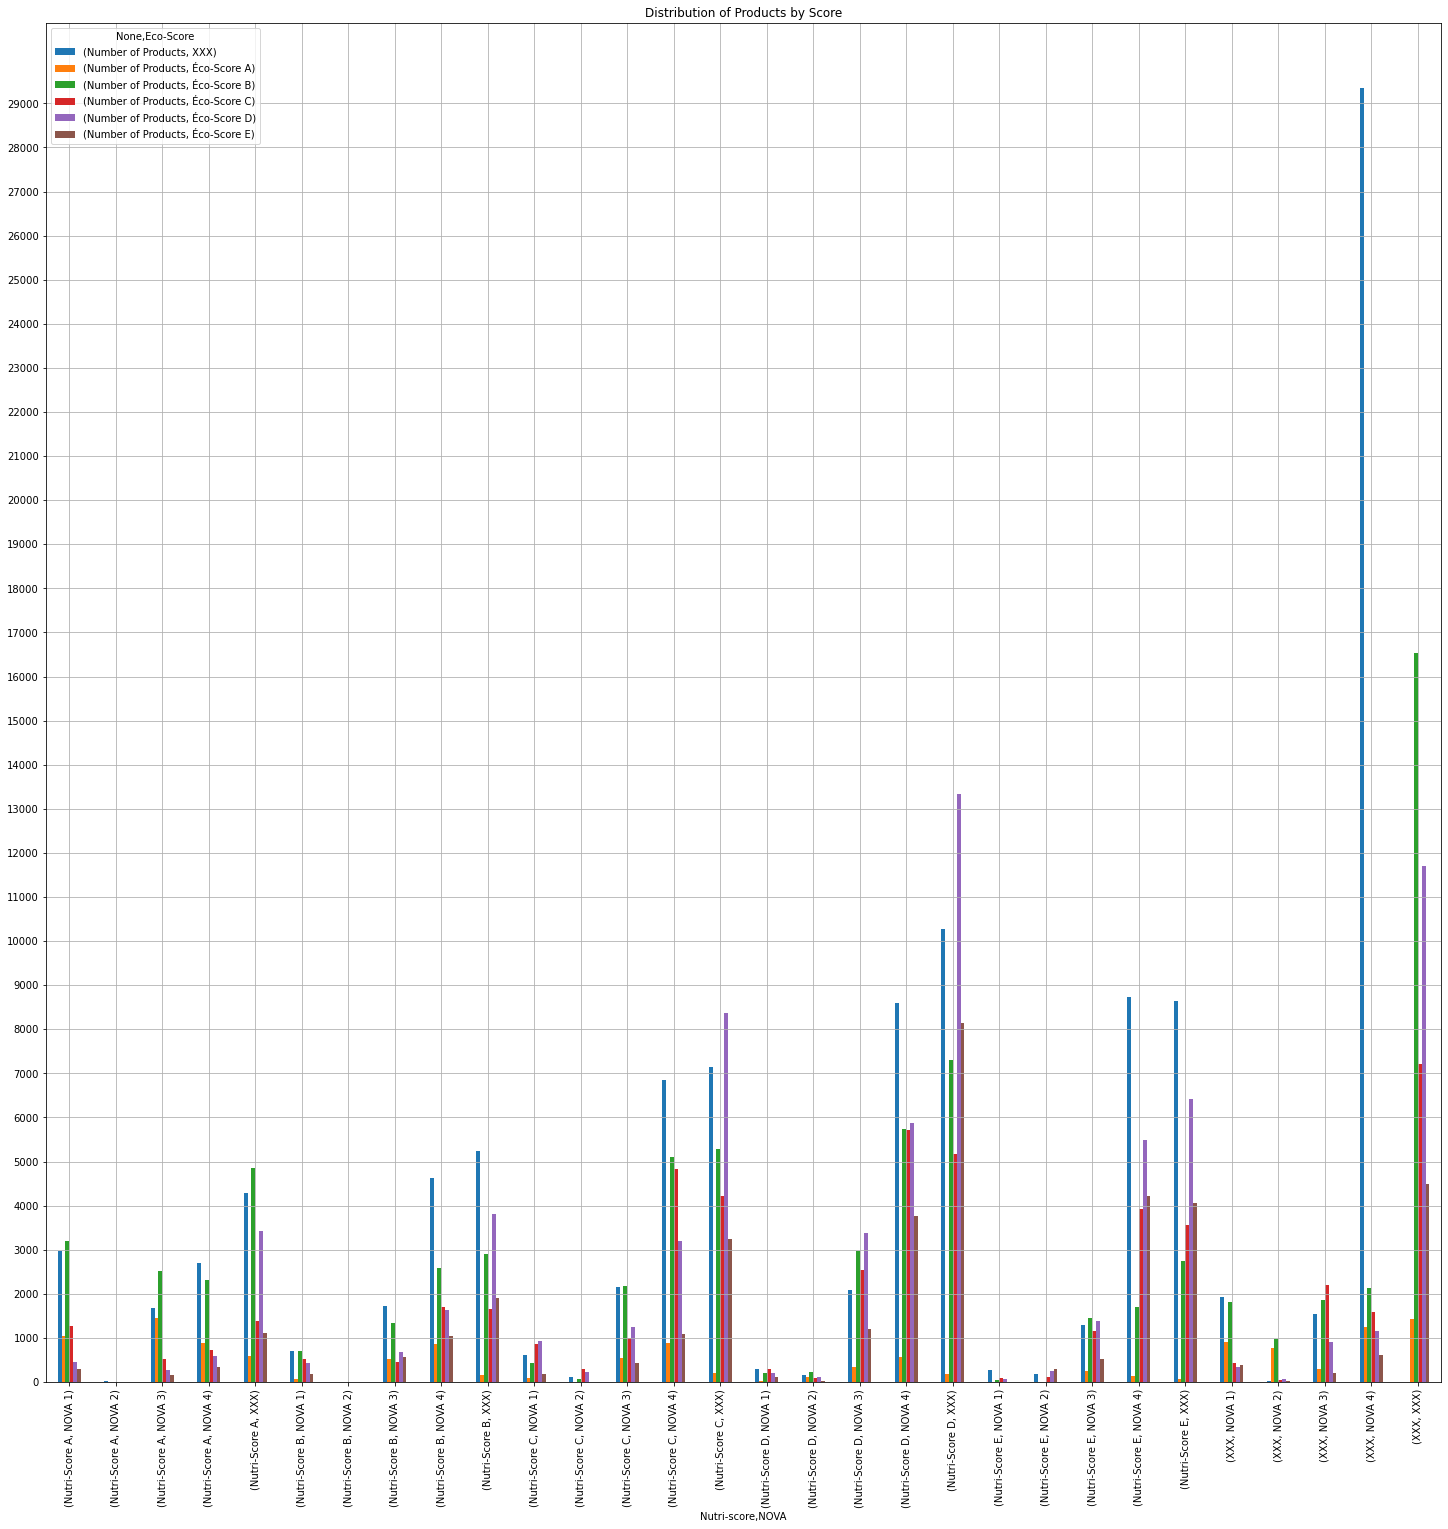

In [15]:
yticks=np.arange(0, df_grouped['Number of Products'].max(), 1000)
df_grouped.unstack().plot(kind='bar', title='Distribution of Products by Score', grid=True, figsize=(25, 25), yticks=yticks)

#### **Question 2**: Liste des produits ayant “gluten free” optimaux (Nutri score A, Nova 1 et Ecoscore A)

##### Create a new column `Free Gluten` in our Dataframe.

In [16]:
def is_gluten_free(lables):
  """
  Checks if the a given product lables / certification is a gluten free
  ----------
  lables: str
    The lables to check.
  
  Returns
  ----------
    str: True is the product is a gluten free, False otherwise
  """
  values = [v.strip() for v in lables.split(',')]
  return 'Sans gluten' in values

df['Free Gluten']=df['Labels, certifications, récompenses'].apply(is_gluten_free)

##### Produits ayant “gluten free” optimaux (Nutri score A, Nova 1 et Ecoscore A)

In [17]:
optimal_products = df[(df['Nutri-score'] == 'Nutri-Score A') & (df['NOVA'] == 'NOVA 1') & (df['Eco-Score'] == 'Éco-Score A') & (df['Free Gluten'])]
optimal_products.head(2)

,Nom du Produit,Code_barres,Nutri-score,NOVA,Eco-Score,Dénomination générique,Quantité,Conditionnement,Marques,Catégories,...,Ingrédients issus de l'huile de palme,Matières grasses / Lipides,Acides gras saturés,Sucres,Sel,Comparaison avec les valeurs moyennes des produits de même catégorie,Energie (kcal),Nombre de calorie (Énergie (kcal)),Impact environnemental,Free Gluten
1673,Tartines craquantes bio au sarrasin sans glute...,3380380046940,Nutri-Score A,NOVA 1,Éco-Score A,XXX,150 g,Carton,Le Pain des Fleurs,"Aliments et boissons à base de végétaux, Alim...",...,No,2.7 g Matières grasses / Lipides en faible qua...,0.6 g Acides gras saturés en faible quantité,1.7 g Sucres en faible quantité,0 g Sel en faible quantité,Tartines craquantes,388 kcal,1 642 kj\n(388 kcal),Très faible impact environnemental,True
1949,Boisson de soja nature sans sucre - Sojasun - 1 L,3273220080108,Nutri-Score A,NOVA 1,Éco-Score A,"Boisson de Soja nature, riche en Calcium, sté...",1 L,Brique,Sojasun,"Aliments et boissons à base de végétaux, Bois...",...,No,1.8 g Matières grasses / Lipides en quantité m...,0.3 g Acides gras saturés en faible quantité,0.5 g Sucres en faible quantité,0.07 g Sel en faible quantité,Boissons végétales de soja nature,32 kcal,133 kj\n(32 kcal),Très faible impact environnemental,True


In [18]:
optimal_products['Nom du Produit'].sort_values()

53893    Ananas origine Philippines en tranches au jus ...
16816    Ananas origine Philippines en tranches au jus ...
19592    Ananas origines Philippines au jus Sans sucres...
31570    Berlingot pomme Bio sans sucres ajoutés - St M...
1949     Boisson de soja nature sans sucre - Sojasun - 1 L
9966                Boisson soja Nature - Sojade - 1 litre
5671     Fines galettes de riz bio - Bjorg - 130g (25 g...
16942                 Fusilli Sarrasin - Valpi Bio - 500 g
40736                     Gourde Pom'potes 5 fruits - 90 g
25150    Grand Ananas Tranches Sans sucres ajoutés - St...
10967    Grand ananas morceaux sans sucres ajoutés - St...
26809    La Pulpe de Tomates Concassées 390 g - Heinz -...
23309              Lentille Verte Du Puy - Sabarot - 500 g
28201                   Lentilles Vertes - Sabarot - 500 g
14665                   Lentilles vertes - Sabarot - 500 g
46239                   Lentilles vertes - Sabarot - 500 g
24668          Lentilles vertes du Berry - Sabarot - 500

#### **Question3:** Nombre de produit dont le ratio sucre/produit est supérieur à 0.6

In [19]:
def get_only_numeric(value):
  """
    Gets only numeric value from string value using regular expression. 
    ----------
    value : str
       The string value containing numeric part
    
    Returns
    ----------
          float: The numeric of the value if it exists. i.e for 'a12bc' it returns 12.0
  """
  # search for digit or float
  value=str(value)
  match = re.search("(\d+.\d+|\d+)", value)
  if match:   
    return float(match.group(0))

df['Sucres Num']=df['Sucres'].apply(get_only_numeric)

# Ici on utilise la quantité du sucre par 100g ou bien par 100ml
df_ratio = df[(df['Sucres Num'] / 100) > 0.6]
df_ratio=df_ratio.sort_values('Nom du Produit')
df_ratio.head(20)

,Nom du Produit,Code_barres,Nutri-score,NOVA,Eco-Score,Dénomination générique,Quantité,Conditionnement,Marques,Catégories,...,Matières grasses / Lipides,Acides gras saturés,Sucres,Sel,Comparaison avec les valeurs moyennes des produits de même catégorie,Energie (kcal),Nombre de calorie (Énergie (kcal)),Impact environnemental,Free Gluten,Sucres Num
56933,"""mini Chupa Chups Lollipops (30 Lollies Per Ba...",8410031936988,Nutri-Score D,NOVA 4,Éco-Score E,"Sucettes aux goûts assortis: fraise, pomme, o...",210g,sachet plastique,Chupa Chups,"Snacks, Snacks sucrés, Confiseries, Bonbons, ...",...,0 g Matières grasses / Lipides en faible quantité,0 g Acides gras saturés en faible quantité,83 g Sucres en quantité élevée,0.1 g Sel en faible quantité,Sucettes,394 kcal,1 653 kj\n(394 kcal),Impact environnemental très élevé,False,83.0
19273,'Made by me' Orange Marmalade,5065000728519,Nutri-Score D,XXX,Éco-Score B,XXX,XXX,XXX,XXX,"Aliments et boissons à base de végétaux, Alim...",...,0.1 g Matières grasses / Lipides en faible qua...,0 g Acides gras saturés en faible quantité,64.9 g Sucres en quantité élevée,0.01 g Sel en faible quantité,Marmelades d'oranges,265 kcal,1 109 kj\n(265 kcal),Faible impact environnemental,False,64.9
10171,(Bonbons) Miel de romarin - Georges Verquin - ...,3501270013518,Nutri-Score D,NOVA 4,Éco-Score C,Bonbons au miel,250 g,Sachet plastique,"Georges Verquin, Verquin","Snacks, Snacks sucrés, Confiseries, Produits ...",...,0 g Matières grasses / Lipides en faible quantité,0 g Acides gras saturés en faible quantité,68 g Sucres en quantité élevée,0.02 g Sel en faible quantité,Bonbons au miel,382 kcal,1 598 kj\n(382 kcal),Impact modéré sur l'environnement,False,68.0
19431,", Sirop de citron, la bouteille de 1 l - Top B...",3410280096476,Nutri-Score E,NOVA 4,XXX,XXX,XXX,XXX,Top Budget,"Boissons, Boissons avec sucre ajouté",...,0.5 g Matières grasses / Lipides en faible qua...,0.1 g Acides gras saturés en faible quantité,72 g Sucres en quantité élevée,0.01 g Sel en faible quantité,Boissons avec sucre ajouté,290 kcal,1 213 kj\n(290 kcal),XXX,False,72.0
54062,-assortiment fruits sec - Holy Fruits,3325350755125,Nutri-Score C,NOVA 4,XXX,XXX,XXX,XXX,Holy Fruits,"Aliments et boissons à base de végétaux, Alim...",...,0.78 g Matières grasses / Lipides en faible qu...,0.18 g Acides gras saturés en faible quantité,68.9 g Sucres en quantité élevée,0.11 g Sel en faible quantité,Fruits secs,382 kcal,1 598 kj\n(382 kcal),XXX,False,68.9
29694,10 sucettes caramel lait frais - Pierrot Gourmand,3608580954163,Nutri-Score D,NOVA 4,Éco-Score E,XXX,XXX,XXX,Pierrot Gourmand,"Snacks, Snacks sucrés, Confiseries, Bonbons, ...",...,2.4 g Matières grasses / Lipides en faible qua...,0.9 g Acides gras saturés en faible quantité,72 g Sucres en quantité élevée,0.12 g Sel en faible quantité,Sucettes,400 kcal,1 674 kj\n(400 kcal),Impact environnemental très élevé,False,72.0
3266,100% Organic Honey - Organics,0079893465005,XXX,NOVA 2,Éco-Score B,XXX,XXX,XXX,"Organics, O Organics","Produits à tartiner, Petit-déjeuners, Produit...",...,0 g Matières grasses / Lipides en faible quantité,0 g Acides gras saturés en faible quantité,76.2 g Sucres en quantité élevée,0 g Sel en faible quantité,Miels,286 kcal,1 197 kj\n(286 kcal),Faible impact environnemental,False,76.2
13177,100% Pure Canadian Maple Syrup,9300641000522,XXX,XXX,XXX,XXX,XXX,XXX,XXX,"Édulcorants, Sirops, Sirops simples, Sirops d...",...,0 g Matières grasses / Lipides en faible quantité,0 g Acides gras saturés en faible quantité,80 g Sucres en quantité élevée,XXX,Sirops d'érable,365.7143 kcal,1 530 kj\n(365 kcal),XXX,False,80.0
57641,100% Pure Maple Syrup - Archer Farms,0085239031971,Nutri-Score D,NOVA 2,XXX,XXX,XXX,XXX,Archer Farms,"Édulcorants, Sirops, Sirops simples, Sirops d...",...,0 g Matières grasses / Lipides en faible quantité,0 g Acides gras saturés en faible quantité,88.3 g Sucres en quantité élevée,0.02 g Sel en faible quantité,Sirops d'érable,333 kcal,1 393 kj\n(333 kcal),XXX,False,88.3
58583

#### **Question4:** Liste des produits dont le nombre de calories pour 100g est supérieur à 500.

I have to create a function using regular expression to get only numerique value.

In [20]:
# Create new column with the numeric Energy
df['Energie KCAL Num'] = df['Energie (kcal)'].apply(get_only_numeric)
df[['Energie (kcal)', 'Energie KCAL Num']]

,Energie (kcal),Energie KCAL Num
0,0 kcal,0.0
1,539 kcal,539.0
2,465 kcal,465.0
3,42 kcal,42.0
4,539 kcal,539.0
...,...,...
61672,325 kcal,325.0
61673,277 kcal,277.0
61674,385 kcal,385.0
61675,467 kcal,467.0


##### **Answer4** Liste des produits dont le nombre de calories pour 100g est supérieur à 500.

In [21]:
calorics_products = df[df['Energie KCAL Num']>500].sort_values('Nom du Produit')
calorics_products=calorics_products['Nom du Produit']

calorics_products.head(10)

52997                             "Celles Sur Belle Butter
59900    "Choc´n Air" Luftige Milchschokolade 150G Tafe...
22507                "Fruits de mer" fins chocolats belges
58845                                 "I cremosi" TIRAMISU
6648       "Isleri" Biscuit With Eurocrem Duo 250G - 250 g
2924                           "Joyeuses Paques" - Monbana
56903    "POULE" de chocolat noir 55% de cacao garni de...
36972    "Tambovskiy Volk" Roasted Sunflower Seeds XXL ...
10338                               "triple Choco Cookies"
60832                                         #Ke cocktail
Name: Nom du Produit, dtype: object

#### **Question 5:** Liste des produits contenant de l’huile de palme, vendu en France et en Belgique

In [22]:
# Show the values
df["Ingrédients issus de l'huile de palme"].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
# Convert Yes/No to boolean values
df["Ingrédients issus de l'huile de palme"]=df["Ingrédients issus de l'huile de palme"].replace({'Yes': True, 'No':False})

In [24]:
filtered=["France", "Belgique"]
def filter_countries(countries_of_sales, countries=filtered):
  """
    Filters sales countries by the given filter
    ----------
      value: str
        the string value containing all countries where the product is sold
    
    Returns
    ----------
       bool: True if the given product is sold in the filtered countries, False otherwise
  """
  for country in countries:
    if country in countries_of_sales:
      return True
  return False

In [25]:
df_by_country = df[(df["Ingrédients issus de l'huile de palme"]) & (df['Pays de vente'].apply(filter_countries))]
df_by_country=df_by_country['Nom du Produit'].sort_values()
df_by_country.head(10)

8892     "Les Schtroumpfs" Biscuits au chocolat - Mcvit...
4328     "black & White" Kekse In Der 176g Packung Von ...
47997                          +linha chocolate - Nacional
21071        ... to go ! Gaufrettes fourrées - Choco Nussa
8460                                                001403
6396                                              06313911
31939           10 Knacks de Poulet - Leader Price - 350 g
8661     10 choco barres chocolat noir - P'tit déli - 2...
42277     10 crêpes sucrées surgelées - Creappetit - 500 g
42285     10 crêpes sucrées surgelées - Creappetit - 500 g
Name: Nom du Produit, dtype: object

#### **Question 6:** Distribution des produits par nombre de pays de vente

In [26]:
def compute_number_of_sales_countries(sales_countries):
  """
    Computes the number of sales countries
    ----------
      sales_countries : str
        the string value containing all countries where the product is sold
    
    Returns
    ----------
      int: The number of sales countries
  """
  return len(sales_countries.split(','))

df['Number of sales countries'] = df['Pays de vente'].apply(compute_number_of_sales_countries)
df[['Nom du Produit', 'Number of sales countries']].sort_values('Number of sales countries', ascending=False)

,Nom du Produit,Number of sales countries
48900,Barra con Proteína - Herbalife - 560g,113
48278,Formula 1 nutritional shake mix fragola deligh...,110
48279,CR7 Drive - Herbalife - 13.5g,110
23150,Mélange pour boisson protéinée - Herbalife - 5...,110
8504,herbalife formule 1 sport - 524 g,109
...,...,...
42433,Micellar casein women's best,1
42434,Petits Coeurs Chocolat Praliné & Ganache - Sav...,1
42436,Roquefort,1
42437,Merguez,1


#### **Question 7:** Proposer au minimum 4 analyses

I suggest some key points for the people with Diabetes. 


##### **Proposition 7.1:** 

- Limiter les quantités de matières grasses, Acide gras et sucre. Avec (Nutri-Score A, NOVA et Éco-Score A) optimal 

In [27]:
df['Acides gras saturés Num']=df['Acides gras saturés'].apply(get_only_numeric)
df['Matières grasses / Lipides Num']=df['Matières grasses / Lipides'].apply(get_only_numeric)


df_optimal_products = df[(df['Nutri-score'] == 'Nutri-Score A') & (df['NOVA'] == 'NOVA 1')]
df_optimal_products=df_optimal_products.sort_values(['Acides gras saturés Num', 'Matières grasses / Lipides Num', 'Sucres Num'])


df_optimal_products = df_optimal_products[['Nom du Produit', 'Code_barres', 'Sucres', 'Acides gras saturés', 'Matières grasses / Lipides', 'Nutri-score', 'NOVA']]
df_optimal_products.head(25)

,Nom du Produit,Code_barres,Sucres,Acides gras saturés,Matières grasses / Lipides,Nutri-score,NOVA
0,"Cristaline Eau de source - 1,5 l",3274080005003,0 g Sucres en faible quantité,0 g Acides gras saturés en faible quantité,0 g Matières grasses / Lipides en faible quantité,Nutri-Score A,NOVA 1
34,Hépar - 1 litre,7613035974685,0 g Sucres en faible quantité,0 g Acides gras saturés en faible quantité,0 g Matières grasses / Lipides en faible quantité,Nutri-Score A,NOVA 1
108,Badoit® - 1 L,3068320114453,0 g Sucres en faible quantité,0 g Acides gras saturés en faible quantité,0 g Matières grasses / Lipides en faible quantité,Nutri-Score A,NOVA 1
164,"Eau - Contrex - 1,5 l",7613035866386,0 g Sucres en faible quantité,0 g Acides gras saturés en faible quantité,0 g Matières grasses / Lipides en faible quantité,Nutri-Score A,NOVA 1
260,La Salvetat - 1.25 l,3068320115160,0 g Sucres en faible quantité,0 g Acides gras saturés en faible quantité,0 g Matières grasses / Lipides en faible quantité,Nutri-Score A,NOVA 1
290,Eau minérale naturelle - Mont Roucous - 1L,3257971309114,0 g Sucres en faible quantité,0 g Acides gras saturés en faible quantité,0 g Matières grasses / Lipides en faible quantité,Nutri-Score A,NOVA 1
319,Rozana - 1 L,3468570116601,0 g Sucres en faible quantité,0 g Acides gras saturés en faible quantité,0 g Matières grasses / Lipides en faible quantité,Nutri-Score A,NOVA 1
559,Evian - 1litre,3068320080000,0 g Sucres en faible quantité,0 g Acides gras saturés en faible quantité,0 g Matières grasses / Lipides en faible quantité,Nutri-Score A,NOVA 1
560,Eau de source de montagne Laqueuille - Marque ...,3564700371107,0 g Sucres en faible quantité,0 g Acides gras saturés en faible quantité,0 g Matières grasses / Lipides en faible quantité,Nutri-Score A,NOVA 1
639,"Courmayeur - Eau minérale naturelle - 1,5 l",8024884500403,0 g Sucres en faible quantité,0 g Acides gras saturés en faible quantité,0 g Matières grasses / Lipides en faible quantité,Nutri-Score A,NOVA 1


##### **Proposition 7.2:** 

- [Oméga-3 d'origine marine : Poissons](https://www.passeportsante.net/fr/Nutrition/Dietes/Fiche.aspx?doc=diabete_diete)

In [28]:
filtered_categories=['Poissons', 'Produits de la mer']
def has_categories(categories, filtered=filtered_categories):  
  """
  Checks if the product categories is part of the given filtered categories
  ----------
     categories: str
       The product's categories
    
  Returns
  ----------
    bool: True if the given product categories is part of the filtered categories, False otherwise
  """
  for category in filtered:
    if category in categories:
      return True
  return False
df_best_fat=df[ df['Catégories'].apply(has_categories)]
df_best_fat[['Nom du Produit', 'Catégories']]

,Nom du Produit,Catégories
328,Le Moelleux - Fleury Michon - 500 g,"Produits de la mer, Poissons, Plats préparés,..."
329,Sardines à l'huile d'olive - Parmentier - 135 ...,"Conserves, Produits de la mer, Poissons, Pois..."
410,Albacore - Thon entier au naturel - petit navi...,"Conserves, Produits de la mer, Poissons, Pois..."
517,Thon entier au nature - Petit Navire - 140g,"Conserves, Produits de la mer, Poissons, Pois..."
547,Croustibat - Findus - 615 g,"Produits de la mer, Poissons, Surgelés, Plats..."
...,...,...
59426,Salmone Irlandese - Carrefour Bio,"Produits de la mer, Poissons, Saumons, Poisso..."
59619,Saumon fumé,"Produits de la mer, Poissons, Saumons, Poisso..."
60139,Filet d'anchois A l'huile d'olive - IASA,"Produits de la mer, Poissons, Anchois, Filets..."
60635,Filets d'anchois à l'huile de tournesol,"Produits de la mer, Poissons, Anchois, Filets..."


##### **Proposition 7.3:** 

- **Products with less calories**

In [29]:
df_less_calories=df[['Nom du Produit', 'Code_barres', 'Energie KCAL Num']].sort_values('Energie KCAL Num')
df_less_calories

,Nom du Produit,Code_barres,Energie KCAL Num
0,"Cristaline Eau de source - 1,5 l",3274080005003,0.0
41842,Herbes de provence - Dia,8480017820457,0.0
41879,Eau minérale,8600037003498,0.0
41883,Eau minérale,8600037003498,0.0
57668,La Baleine Fleur De Sel 125G - 125 g,3183280005044,0.0
...,...,...,...
61623,Fleur de courgette - Oriani & Pecchia - 60 g,8055684340005,NaN
61651,Aranciata rossa - Macario retrò drink - 250ml,8055965020022,NaN
61655,Torrone Ricoperto all Arancia - - 140g,8056039700215,NaN
61668,Cioccolato al latte Biologico 39% Cacao - Otto...,8056450920162,NaN


##### **Proposition 7.4:** 

- Less sugar


In [30]:
df_less_sugar=df[ df['Catégories'].apply(lambda v:has_categories(v, ['sans sucre']))]
df_less_sugar[['Nom du Produit', 'Catégories', 'Sucres Num']].sort_values('Sucres Num')

,Nom du Produit,Catégories,Sucres Num
108,Badoit® - 1 L,"Boissons, Boissons gazeuses, Eaux, Eaux de so...",0.0
34471,"Lemon, Ginger & Ginseng Infusion - Marks & Spe...","Aliments et boissons à base de végétaux, Bois...",0.0
34572,"Smile Chewing-gum - Jet Gum - 54,8 g (2 * 27.4 g)","Snacks, Snacks sucrés, Confiseries, Chewing-g...",0.0
34800,Badoit Citron Vert - 6 * 33 cl,"Boissons, Boissons gazeuses, Eaux, Eaux gazeu...",0.0
35878,Eau de source de montagne d'Auvergne - Mont Do...,"Boissons, Eaux, Eaux de sources, Eaux minéral...",0.0
...,...,...,...
55597,Thé aromatique aux plantes - LuxoHeal - 120g,"Aliments et boissons à base de végétaux, Bois...",NaN
57061,Espresso Arabica 100% - Pellini - 50 g (10 cap...,"Aliments et boissons à base de végétaux, Bois...",NaN
57063,Luxury Coffee Absolute - Pellini - 50 g (10 ca...,"Aliments et boissons à base de végétaux, Bois...",NaN
57728,"Mio caffè Lungo - Segafredo - 75 g (10x 7,5 g)","Aliments et boissons à base de végétaux, Bois...",NaN
